# Final Project Template

For the final project for this module, you are asked to use data analysis techniques and linear regression to create a model to predict housing prices. 

In Video 7.9, Dr. Williams presented you with an example of data analysis in which housing prices were predicted by using just the columns `OverallQual` and `MassVnrArea` from the data provided. In Video 7.10, Dr. Williams showed more examples of data visualization and manipulation in addition to a more detailed analysis of the data.

Your challenge in this project is to improve Dr. Williams' results from Video 7.9 by choosing different variables in the *dataframe* to create your model. Although in Video 7.10 you are offered a sample data analysis which uses five columns from the data provided, your project submission must include an analysis of at least three additional variables and offer other solutions that improve the results obtained by Dr. Williams in these two videos.

Before you fill out the project outline template below, make sure you:

- Read through the template completely to understand the instructions for the structure of the project.
- Have a clear understanding of what to do to create a model that will return the results you want to find.
- Use Markdown to edit the template.

<div class="alert alert-block alert-success">
The purpose of this Jupyter Notebook is to give you a structure to follow when you are solving your problem and developing your model with Python. Make sure you follow it carefully. You can add more subsections if needed, but remember to fill out every section provided in the template.
</div>

<div class="alert alert-block alert-danger">
Delete all cells above, including this one, before submitting your final Notebook.
</div>

# Predicting Housing Prices

**Andrew Buensalida**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('houseSmallData/houseSmallData.csv')
print(df.shape)
# print(df)
train = df.iloc[0:20,:]
print(train.head())

(100, 82)
   Unnamed: 0  Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0           0   1          60       RL         65.0     8450   Pave   NaN   
1           1   2          20       RL         80.0     9600   Pave   NaN   
2           2   3          60       RL         68.0    11250   Pave   NaN   
3           3   4          70       RL         60.0     9550   Pave   NaN   
4           4   5          60       RL         84.0    14260   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0      Reg         Lvl  ...        0    NaN   NaN         NaN       0      2   
1      Reg         Lvl  ...        0    NaN   NaN         NaN       0      5   
2      IR1         Lvl  ...        0    NaN   NaN         NaN       0      9   
3      IR1         Lvl  ...        0    NaN   NaN         NaN       0      2   
4      IR1         Lvl  ...        0    NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  


The formula for multiple regression is:

Y = β0 + β1*X1 + β2*X2 + ... + βn*Xn + ε

Where:
- Y is the dependent variable (the variable you want to predict)
- X1, X2, ..., Xn are the independent variables (the variables used to predict Y)
- β0 is the intercept (the value of Y when all independent variables are zero)
- β1, β2, ..., βn are the regression coefficients (the estimated effect of each independent variable on Y)
- ε is the error term (the difference between the predicted and actual values of Y)

The goal of multiple regression is to estimate the values of the regression coefficients (β0, β1, β2, ..., βn) that minimize the sum of squared errors (SSE) between the predicted and actual values of Y. This is typically done using statistical techniques such as ordinary least squares (OLS) regression.

Once the regression coefficients are estimated, you can use the formula to predict the value of Y for new observations by plugging in the values of the independent variables.

In [8]:
# Investigate Sale Price

train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

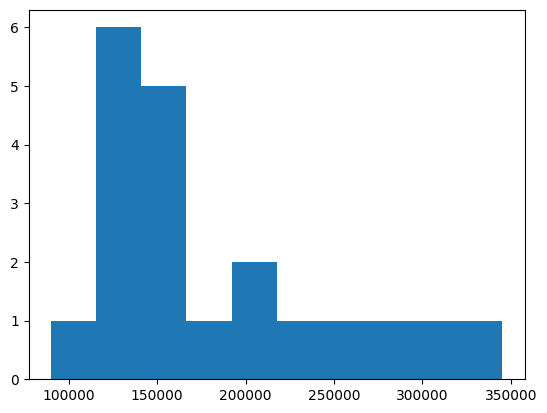

In [11]:
# plot histogram of Sale Price

plt.hist(train['SalePrice'])

In [12]:
# select only numeric columns
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 40)

In [15]:
# calculate correlation matrix

corr = numeric.corr()
corr

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,1.000000,-0.193598,-0.088518,-0.022926,-0.430528,0.116266,-0.161701,-0.201688,-0.183747,...,0.021717,-0.179599,-0.179036,0.099464,NaN,NaN,0.158107,0.002688,0.112252,-0.298403
Id,1.000000,1.000000,-0.193598,-0.088518,-0.022926,-0.430528,0.116266,-0.161701,-0.201688,-0.183747,...,0.021717,-0.179599,-0.179036,0.099464,NaN,NaN,0.158107,0.002688,0.112252,-0.298403
MSSubClass,-0.193598,-0.193598,1.000000,-0.434814,-0.265576,-0.088740,-0.079637,-0.285156,-0.254484,-0.119620,...,-0.124075,0.050924,0.007381,-0.169753,NaN,NaN,0.029159,-0.166517,-0.161961,-0.199414
LotFrontage,-0.088518,-0.088518,-0.434814,1.000000,0.708056,0.194566,-0.243356,0.742319,0.517815,0.589920,...,-0.074921,-0.421768,0.307046,NaN,NaN,NaN,0.280686,0.594937,-0.077779,0.606910
LotArea,-0.022926,-0.022926,-0.265576,0.708056,1.000000,-0.068032,-0.374245,0.613547,0.344768,0.307098,...,0.095300,-0.246602,0.362142,0.249875,NaN,NaN,0.304298,0.521199,0.115137,0.265787
OverallQual,-0.430528,-0.430528,-0.088740,0.194566,-0.068032,1.000000,-0.105674,0.263981,0.529897,0.698327,...,0.247734,0.194060,-0.235046,-0.235046,NaN,NaN,-0.340349,0.161215,-0.283403,0.807380
OverallCond,0.116266,0.116266,-0.079637,-0.243356,-0.374245,-0.105674,1.000000,-0.348977,-0.148109,-0.278840,...,-0.044798,-0.173233,-0.141975,0.094650,NaN,NaN,0.087985,-0.121477,0.148359,-0.260414
YearBuilt,-0.161701,-0.161701,-0.285156,0.742319,0.613547,0.263981,-0.348977,1.000000,0.731516,0.596647,...,0.074993,-0.532799,0.163350,-0.090477,NaN,NaN,0.066885,0.451710,0.068877,0.699627
YearRemodAdd,-0.201688,-0.201688,-0.254484,0.517815,0.344768,0.529897,-0.148109,0.731516,1.000000,0.490651,...,0.174438,-0.427673,0.153850,-0.223627,NaN,NaN,-0.095035,0.412378,-0.225315,0.698731
MasVnrArea,-0.183747,-0.183747,-0.119620,0.589920,0.307098,0.698327,-0.278840,0.596647,0.490651,1.000000,...,0.404354,-0.005701,-0.195828,-0.195828,NaN,NaN,-0.048604,0.360318,0.025313,0.788274


In [21]:
# What are the top 3 columns correlated with Sale Price?

cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea'], dtype='object')

In [25]:
# Pick out the x and y columns

X = train[cols[1:]]

Y = train['SalePrice']


In [28]:
# build regression model

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)


LinearRegression()

In [29]:
# how good is the model
model.score(X,Y) # mean accuracy score of the model. R^2. How much of the sales price is explained by the 2 independent variables

0.7501993255220817

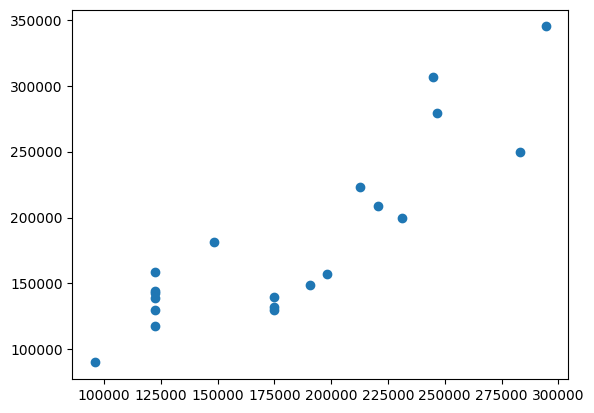

In [32]:
# Scatter plot of the predictions against the actual values Y. It should be a straight line with a slope of 1
plt.scatter(predictions, Y)

In [38]:
# Improving model
train = df.iloc[0:100, :] # select more data
print(train.head())

   Unnamed: 0  Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0           0   1          60       RL         65.0     8450   Pave   NaN   
1           1   2          20       RL         80.0     9600   Pave   NaN   
2           2   3          60       RL         68.0    11250   Pave   NaN   
3           3   4          70       RL         60.0     9550   Pave   NaN   
4           4   5          60       RL         84.0    14260   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0      Reg         Lvl  ...        0    NaN   NaN         NaN       0      2   
1      Reg         Lvl  ...        0    NaN   NaN         NaN       0      5   
2      IR1         Lvl  ...        0    NaN   NaN         NaN       0      9   
3      IR1         Lvl  ...        0    NaN   NaN         NaN       0      2   
4      IR1         Lvl  ...        0    NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  
0   2008  

In [39]:
salePrice = train['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

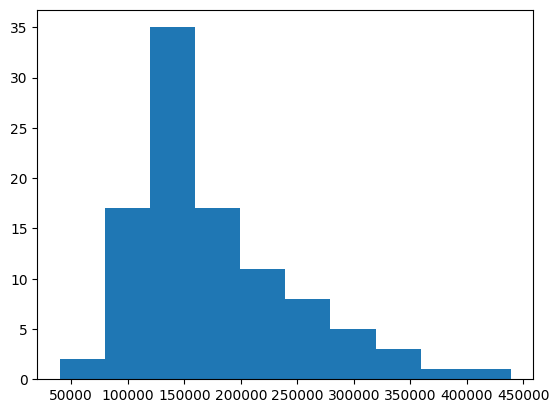

In [40]:
plt.hist(salePrice) # it is skewed to the left. Looks like a log normal distribution

(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

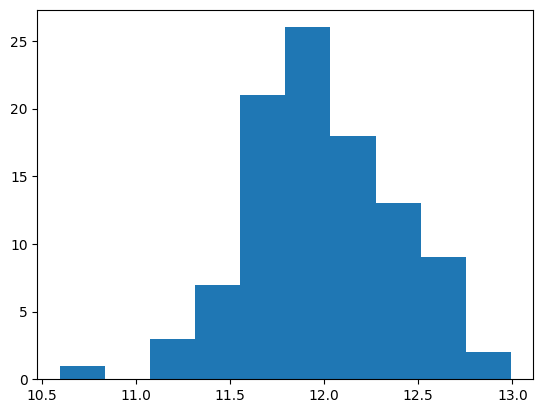

In [41]:
plt.hist(np.log(salePrice)) # looks more normal

In [42]:
salePrice.skew() # skewness of the data

1.1783462304851948

In [47]:
target = np.log(salePrice)
np.log(salePrice).skew() # skewness of the log transformed data. It is closer to 0

-0.09632240207755555

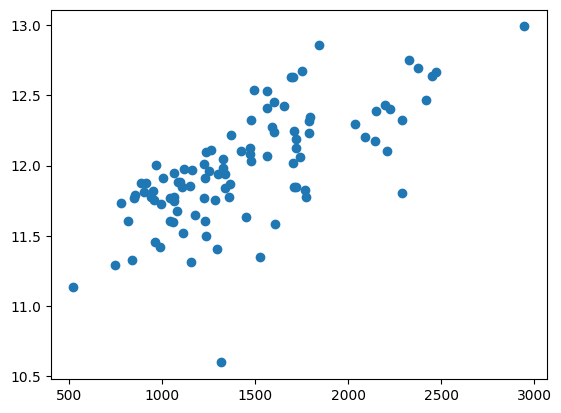

In [48]:
plt.scatter(train['GrLivArea'], target) # scatter plot of GrLivArea against the target. Since it looks like the slope is 1, it might be a good predictor

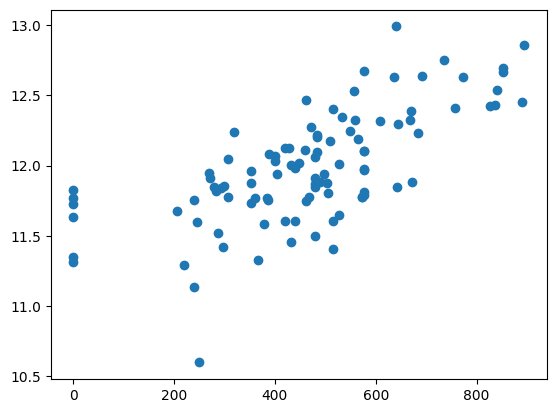

In [49]:
plt.scatter(train['GarageArea'], target) # scatter plot of GarageArea against the target. It looks like it is a good predictor

In [52]:
# find the nulls
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nulls
# Since PoolQC, MiscFeature, Alley, Fence, FireplaceQu have a lot of nulls, we can drop them

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
MasVnrType,60
...,...
MasVnrArea,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?




[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .
